In [1]:
# Nạp các gói thư viện NumPy và Pandas
import pandas as pd
import numpy as np
import regex
import string

In [2]:
#Tạo đường link
import sys
import os

current = os.path.abspath('')
parent = os.path.dirname(current)
grandparent = os.path.dirname(parent)

In [3]:
#File path

#Sentiment vector
df_file = parent+"/data/processed/sentiments_vector.csv"

#Media data
title_file = parent+"/data/processed/media07_01_2023.xlsx"

In [4]:
data = pd.read_csv(df_file)
data

,bctc,biến_động,biện_pháp,bán,báo,báo_chí,báo_cáo,bên,bước,bất_thường,...,nguyễn_văn_cưng,HLY,TNM,deep,title,return,ma_ck,Date,session,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,hoàng gia lai hagl lãi trở_lại sau đức hào_phó...,-0.008830,HAG,2023-01-10,return_before_session,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,thực_hiện quyền nhận cổ_tức cổ_phiếu,-0.007624,PET,2023-01-10,return_in_session,6
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,sau khi hạ chỉ tiêu bất_ngờ báo lãi thuế gần,0.048654,PLX,2023-01-10,return_in_session,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,thông_báo dự_kiến tổ_chức đại_hội_đồng cổ_đông...,-0.017544,PRT,2023-01-10,return_in_session,6
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,thông_qua chủ_trương giao_dịch bên có liên_quan,-0.065032,TDH,2023-01-10,return_before_session,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,chuỗi dự_án khí điện lô b tiến thêm bước quan_...,-0.002611,PLX,2023-02-24,return_before_session,12
195,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,chuỗi dự_án khí điện lô b tiến thêm bước quan_...,0.002291,PVD,2023-02-24,return_before_session,12
196,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,chuỗi dự_án khí điện lô b tiến thêm bước quan_...,0.003766,PVS,2023-02-24,return_before_session,12
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,thông_báo dự_kiến tổ_chức đại_hội_đồng cổ_đông...,0.022990,PVV,2023-02-24,return_in_session,10


# Chuan bi cot sentiment

In [10]:
data['Date'] = pd.DatetimeIndex(data['Date'])

In [11]:
sentiments = data.columns.tolist()
for i in ['title', 'return', 'deep', 'ma_ck', 'Date', 'sum', 'session']:
  sentiments.remove(i)

# Ve WordCloud

In [15]:
# Cai dat thu vien de ve do thi
import matplotlib.pyplot as plt
from wordcloud import WordCloud

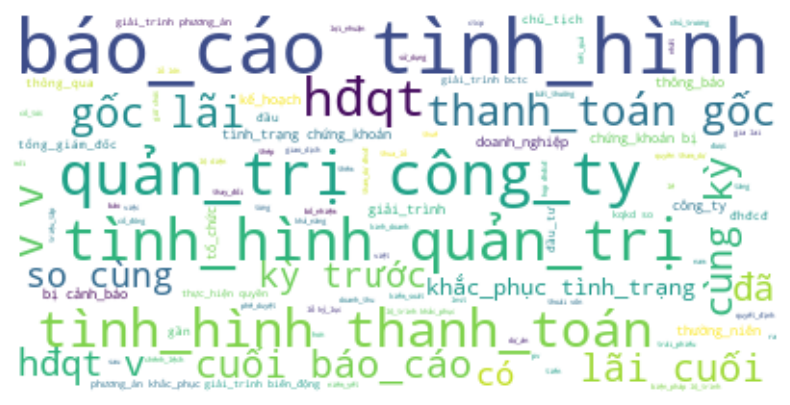

In [17]:
# WordCloud những từ có ảnh hưởng tích cực
text = " ".join(title for title in data[data['return']>0]['title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = ['bán', 'mua', 'cp', 'đăng_ký', 'nghị_quyết', 'cổ_phiếu'], max_font_size=50, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

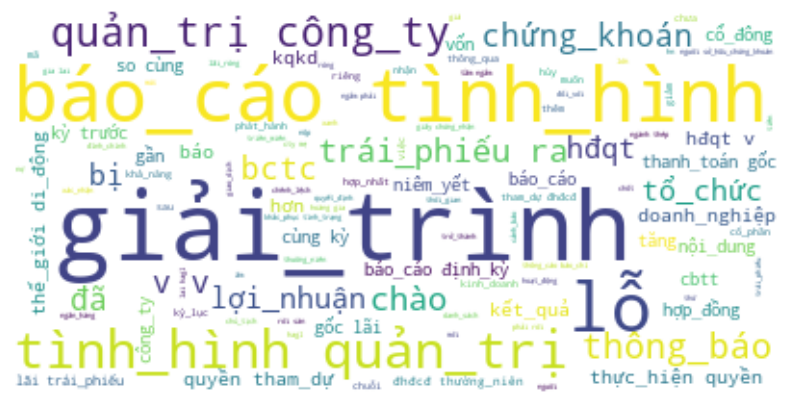

In [19]:
# WordCloud những từ có ảnh hưởng tiêu cực
text = " ".join(title for title in data[data['return']<0]['title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = ['bán', 'mua', 'cp', 'đăng_ký', 'nghị_quyết', 'cổ_phiếu', 'có', 'ctcp'], max_font_size=50, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# MODELLING

In [20]:
X = data[sentiments]
y = data['return']

In [21]:
# Scaling X
# from sklearn.preprocessing import StandardScaler
# sentiments_scaled = pd.DataFrame(data = StandardScaler().fit_transform(W))
sentiments_scaled = X

In [22]:
# Split train and test sample
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(sentiments_scaled, y, test_size=0.2, random_state=42)
X_train = X
X_test = X
y_train = y
y_test = y

In [23]:
X

,bctc,biến_động,biện_pháp,bán,báo,báo_chí,báo_cáo,bên,bước,bất_thường,...,TGG,TNI,TTF,UDC,VFG,VOS,VTR,nguyễn_văn_cưng,HLY,TNM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# data['date'] = pd.DatetimeIndex(data['Date'])
# train_index = data[data['date']<'2022-06-01'].index
# test_index = data[data['date']>='2022-06-01'].index

# X_train = sentiments_scaled[sentiments_scaled.index.isin(train_index)]
# X_test = sentiments_scaled[sentiments_scaled.index.isin(test_index)]

# y = y[y.index.isin(sentiments_scaled.index)]
# y_train = y[y.index.isin(train_index)]
# y_test = y[y.index.isin(test_index)]

In [25]:
y_train.shape

(199,)

In [28]:
#FITTING THE CLASSIFICATION MODEL using Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=52)
model.fit(X_train, y_train.values)

#Predict y value for test dataset
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
print('Chỉ R2 trong tập train là: ', r2_score(y_test, y_pred))

Chỉ R2 trong tập train là:  0.8317257796944233


In [29]:
# Save model
import pickle
filename = parent+'/data/processed/regression_model.sav'
pickle.dump(model, open(filename, 'wb'))